In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# The earths energy balance

## Overview
This module will explore the global energy balance of the earth and the role that the atmosphere plays in determining the average temperature of the earths surface

## Learning objectives
1. Understand the basics of solar radiation, energy from the sun
2. Understand how the earth receives radiative energy from the sun and loses that energy
3. Be able to calculate a rough estimate of global average temperature without an atmosphere and with an approximation of the real atmosphere

## Radiation from the sun
At the simplest level the earth is basically a large sphere in space, roughly 150 million km from the Sun, its primary source of energy.


The temperature of the surface of the sun is around 5,778K (kelvin) on average.  The Stefan-Boltzmann law allows to calculate the power per unit area (1 meter square) at the suns surface.


$R_s= \sigma T_s^4$

Where $R_s$ is the radiative flux ($W/m^2$) at the surface of the sun, $\sigma$ is the Stefan-Boltzmann constant, and $T_s$ is the temperature of the sun's surface in Kelvin.  We can use some python code to calculate the actual value:

In [2]:
Ts = 5778  # Temperature of the sun
sigma = 5.670374419 * (10**-8) # Stefan-Boltzmann constant
Fs = sigma * Ts**4
print("Radiative flux at surface of the sun = ", Fs, "(W/m^2)")

Radiative flux at surface of the sun =  63200699.73478983 (W/m^2)


However, as we move away from the sun, this energy is spread out over a greater and greater area and so the power per square meter drops according to the equation:

$$F_D = Fs (4\pi R_s^2)/(4\pi D^2)$$

Where $F_D$ is the flux at distance D from the sun. $R_s$ is the radius of the sun so $(4\pi R_s^2)/(4\pi D^2$ is simply the ratio of the area of the sun to the area of an imaginary sphere with radius the distance from the sun to the earth $D$.

Earth is, on average, about 149,597,870 km from the sun.  So we can calculate the radiative flux from the sun at that distance: 


In [6]:
Rsun = 696340000              # Radius of the sun
Dearth = 149597870700         # Distance of earth from sun (1 astronomical unit)

# A function to calcuate the suns radiative flux at a distance D from the sun
def R(D):
    return Fs*(4 * 3.1415927 * Rsun**2)/(4 * 3.1415927 * D**2)

S0 = R(Dearth)

print("Radiative flux at earth distance from the sun = ", S0, "(W/m^2)")


#D = np.arange(696340000, 149000000000, 1000000, dtype=np.float32)
#R = np.array([Fs*(4 * 3.1415927 * Rsun**2)/(4 * 3.1415927 * Di**2) for Di in D])
#plt.plot(D/1000000,R)
#plt.scatter(Dearth/1000000, Rearth)
    

Radiative flux at earth distance from the sun =  1369.3477384759963 (W/m^2)


This value is called the solar constant, though in practice its not a really a constant as it does vary through time because of variations in the irradiance of the sun and variations in the orbital distance of the earth which we will explore in module [X]

However, it is interesting to look at how the suns radiative flux reduces rapidly as you move away from the sun.  This is because the area of the surface of a sphere increases with the square of the radius so doubling the radius makes the surface of our imaginary sphere 4 times larger so the suns energy is spread of 4 times the area and hence is 1/4 of the magnitude for each unit area.

Lets look at this function all the way from the sun past the first planet, Mercury (58 million km) out to the earth and on to the last proper planet, Neptune (4.5 billion km).  Because these distances are so huge we tend to translate them into *astronomical units* which is the average distance between the earth and the sun, or 149,597,870 km.  

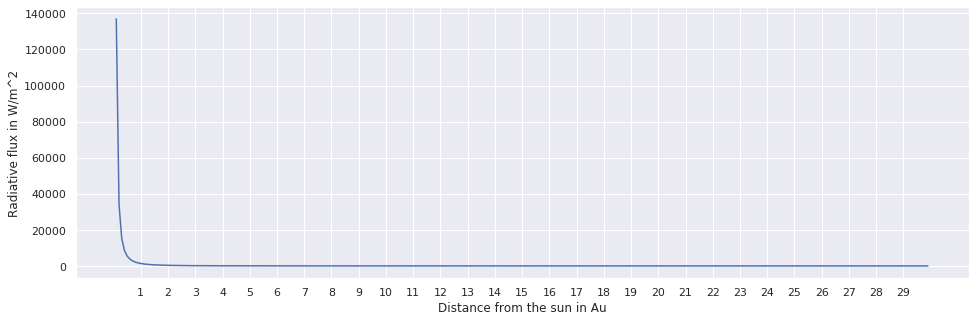

In [4]:
# The same function as above but translated into astronomical units
def R(Au):
    return Fs*(4 * 3.1415927 * Rsun**2)/(4 * 3.1415927 * (Dearth * Au)**2)

# Here we create a range of distances in Au starting near the sun at 0.1 Au, 
# and ending with Neptune at 30 Au
D = np.arange(0.1, 30, 0.1)

# Now we can calculate the Radiative flux R for all these distances from the sun
R = np.array([R(d) for d in D])

# Now we plot this function
plt.subplots(figsize=(16, 5))
ax = sns.lineplot(D, R, markers=True)
labels = ax.set(xlabel='Distance from the sun in Au', ylabel='Radiative flux in W/m^2')
ticks = ax.set(xticks=np.arange(1,30))

That's not very easy to read though because the radiative flux drops off so fast!  Let's plot it again by using a logarithmic scale on the vertical (y) axis.  The values along a logarithmic scale increase exponentially so instead of a sequence like $(0, 10, 20, 30)$, we have a sequence like $(10, 100, 1000)$ or writing it with exponents: $(10^1, 10^2, 10^3)$.  This can be very helpful when we have data that has some very large values but also lots of much smaller values.

Lets also plot all the planets, just for fun.

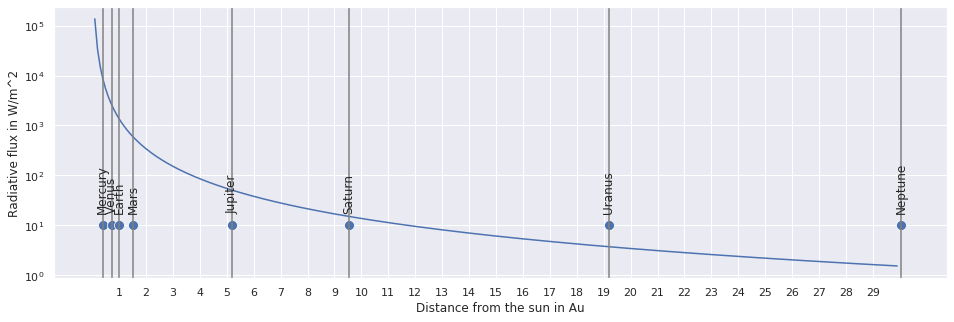

In [5]:
from vega import VegaLite

# Here are the planet distances in Au
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
distances = [0.39, 0.723, 1.0, 1.524, 5.203, 9.539, 19.18, 30.06]


# Now we plot this function
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x=D, y=R)

# Draw the planets as dots
sns.scatterplot(x=distances, y=[10]*len(planets), s=100, markers=True)

# Just lable the axes and set the x axis markers
labels = ax.set(xlabel='Distance from the sun in Au', ylabel='Radiative flux in W/m^2')
ticks = ax.set(xticks=np.arange(1,30))

# Set our y axis to use logarithmic scale
ax.set(yscale='log')

# Label and mark the planets
for planet, distance in zip(planets, distances):
    ax.axvline(distance, color='grey')
    ax.annotate(planet, (distance, 20), horizontalalignment='center', rotation=90)


So now we can see that Mercury, even though its only a bit more than half way to the sun, receives around 10 times as much radiative energy from the sun as earth, while Neptune receives on a tiny fraction.

## The Earths energy balance
Lets focus now on how the suns radiative energy interacts with the earth.  In particular lets try to figure out how warm the earth is.

We start with the simplest assumption which is that the energy from the sun is distributed evenly over the whole surface of the earth.  We know this isn't true but its a good starting point.

So if the incoming solar radiation flux from the sun, $S_0$ is 1369 watts per square meter, as we've calculated above and looking at the earth from the sun, the area of the earth is the same as the area of a disc of the same radius as the earth $R$, then the total energy received by the earth, $E_{in}$ is:

$$E_{in}= S_0\pi R^2$$

But this is being distributed evenly across the whole earths surface which has an area of $4\piR^2$.  So the resultant energy flux distributed over the surface of the earth is:

$$Q_{in} = S_0 \frac{\pi R^2}{4 \pi R^2}$$

or 

$$Q_{in} = S_0/4$$

which we can quickly calculate as 

In [12]:
Qin = S0/4
print(Qin, 'W/m^2')

342.33693461899907 W/m^2


So that is our incoming solar flux.  When this radiation hits the surface of our simplified earth, some of it is reflected back to space, and some of it is absorbed.  We call this fraction the *albedo*.  Ice has a very large albedo, close to 1.  Dark rock has a very low albedo, closer to 0.  On average the real earths albedo is around 0.3.  So the radiation from sun that is absorbed is:

$$Q_{absorbed} = (1-\alpha)Q_{in}$$

At the same time, as long the temperature of simple earth is not zero Kelvin (absolute zero), it will also emit radiation.  Exactly the same as our calculation for the sun earlier on, we can calculate how much radiative flux is leaving the earth using the Stefan-Boltzmann equation:

$$ Q_{out} = \sigma T_{earth}^4$$

Where $\sigma$ is once again the Stefan-Boltzmann constant and $T_{earth} is the temperature of our simple earth.  Of course we don't know what the temperature of our earth is yet but we do know that for the temperature to be constant the energy coming in from the sun must be balanced by the energy leaving.  If more energy is coming in than is going out the earth will keep getting warmer.  If more energy is going out than coming it then it will get cooler.  So for a stable temperature we can set:

$$ Q_{asborbed} = Q_{out} $$

which means that

$$ (1-\alpha)Q_{in} = \sigma T_{earth}^4$$

so we can easily solve for $T_{earth}$

$$ T_{earth} = \sqrt[4]{(\frac{(1-\alpha)Q_{in}}{\sigma})}$$

So now we know everything we need to know and calculate the average temperature of our simplified earth


In [18]:
albedo = 0.3
Tearth = (((1-albedo)*Qin)/sigma)**(1/4)
print("Temperature of the earth =", Tearth, 'K')   # In Kelvin (SI unit)
print("Temperature of the earth =", Tearth-273, 'C') # In centigrade

Temperature of the earth = 254.96761130367986 K
Temperature of the earth = -18.03238869632014 C


So the average temperature of our simplified earth is -18C. But the average temperature of the surface of the real earth is around 15C, so we are quite far off.  Our initial model is clearly not very accurate.  In the next section we will make our model much more realistic by adding in a simple approximation for the atmosphere which our current model does not include.

In [ ]:
## Adding an atmosphere

